In [9]:
# Notebook: 3_data_mining.ipynb
# Author: Hope Kimandi
# Dataset: bank_additional_transformed.xlsx

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.frequent_patterns import apriori, association_rules

# Set visualization style
sns.set(style='whitegrid', palette='muted')

# Load transformed dataset
dataset_path = r'C:\Users\lenovo\OneDrive\Desktop\KEndy\ASSIGNMENTS\DSA Assignments\DSA 2040\Data mining_group project_Hope\DATA\transformed\bank_additional_transformed.xlsx'
df = pd.read_excel(dataset_path)


d:\ANACONDA\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()
d:\ANACONDA\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()


In [ ]:
# Step 1: Preprocessing for Data Mining

# Encode categorical features for clustering and classification
cat_cols = df.select_dtypes(include=['object']).columns
df_encoded = df.copy()
le_dict = {}
for col in cat_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    le_dict[col] = le

# Standardize numerical features for clustering
numeric_cols = df_encoded.select_dtypes(include=['int64','float64']).columns
df_encoded[numeric_cols] = StandardScaler().fit_transform(df_encoded[numeric_cols])


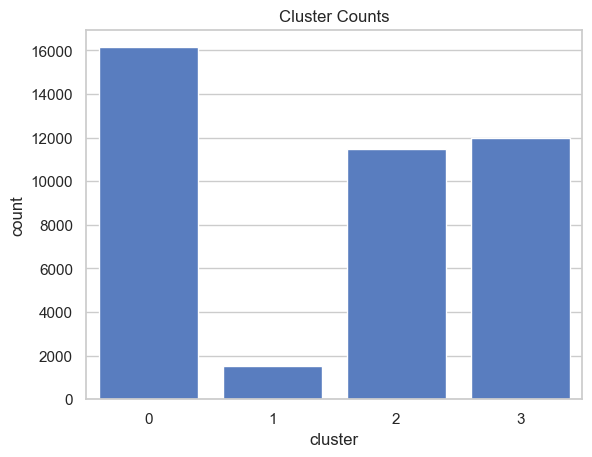

In [8]:
# Step 2: Clustering (K-Means)

kmeans = KMeans(n_clusters=4, random_state=42)
df_encoded['cluster'] = kmeans.fit_predict(df_encoded[numeric_cols])

# Visualize cluster counts
sns.countplot(x='cluster', data=df_encoded)
plt.title('Cluster Counts')
plt.show()

In [ ]:
# Step 3: Classification (Decision Tree)

# Ensure target is strictly 0 or 1 integers
df_encoded['y_binary'] = df_encoded['y_binary'].apply(lambda x: 1 if x >= 0.5 else 0).astype(int)

# Features and target
y = df_encoded['y_binary']
X = df_encoded.drop(['y','y_binary','cluster'], axis=1)


# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Train decision tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


# Predictions
y_pred = clf.predict(X_test)

# Evaluation
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     10929
           1       0.49      0.49      0.49      1424

    accuracy                           0.88     12353
   macro avg       0.71      0.71      0.71     12353
weighted avg       0.88      0.88      0.88     12353

Confusion Matrix:
[[10193   736]
 [  720   704]]


In [14]:
# ----------------------------
# Step 4: Association Rules (Market Basket Analysis)
# ----------------------------

# Select only binary categorical features for Apriori
basket_df = df[['job','marital','education','default','housing','loan','contact','poutcome','y']].copy()
# Convert to one-hot encoding
basket_encoded = pd.get_dummies(basket_df)

# Generate frequent itemsets
frequent_itemsets = apriori(basket_encoded, min_support=0.05, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.6)

# Sort and display top 10 rules
rules.sort_values(by='confidence', ascending=False).head(10)



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
2629,"(contact_telephone, default_unknown, housing_no)",(poutcome_nonexistent),0.051826,0.863391,0.051559,0.994845,1.152253,1.0,0.006813,26.502089,0.139358,0.059699,0.962267,0.527281
5306,"(contact_telephone, loan_no, marital_married, ...",(poutcome_nonexistent),0.061031,0.863391,0.060666,0.994031,1.151310,1.0,0.007973,22.886512,0.139966,0.070236,0.956306,0.532148
3904,"(marital_married, contact_telephone, default_u...",(poutcome_nonexistent),0.073538,0.863391,0.073077,0.993725,1.150956,1.0,0.009584,21.771113,0.141568,0.084594,0.954068,0.539182
4797,"(contact_telephone, default_unknown, loan_no, ...",(poutcome_nonexistent),0.081892,0.863391,0.081358,0.993476,1.150667,1.0,0.010653,20.938389,0.142618,0.094173,0.952241,0.543853
3873,"(marital_married, contact_telephone, default_u...",(poutcome_nonexistent),0.063144,0.863391,0.062731,0.993462,1.150650,1.0,0.008213,20.893096,0.139751,0.072621,0.952137,0.533059
1786,"(marital_married, contact_telephone, default_u...",(poutcome_nonexistent),0.076112,0.863391,0.075602,0.993299,1.150462,1.0,0.009888,20.387223,0.141559,0.087513,0.950950,0.540432
2667,"(contact_telephone, default_unknown, y_no)",(poutcome_nonexistent),0.099111,0.863391,0.098407,0.992894,1.149993,1.0,0.012835,19.224142,0.144779,0.113884,0.947982,0.553436
2651,"(contact_telephone, default_unknown, loan_no)",(poutcome_nonexistent),0.084880,0.863391,0.084272,0.992847,1.149939,1.0,0.010988,19.097897,0.142482,0.097538,0.947638,0.545227
788,"(contact_telephone, default_unknown)",(poutcome_nonexistent),0.102803,0.863391,0.102001,0.992204,1.149194,1.0,0.013242,17.523171,0.144701,0.118031,0.942933,0.555172
5025,"(contact_telephone, job_blue-collar, loan_no, ...",(poutcome_nonexistent),0.059136,0.863391,0.058505,0.989322,1.145856,1.0,0.007447,12.793931,0.135291,0.067712,0.921838,0.528542
